<a href="https://colab.research.google.com/github/mcorbach/Machine-Learning-Ed.-Digital---Nov21/blob/main/Copia_de_Machine_Learning_Chapter2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA: Exploratory Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


¿Cómo pasamos de los datos a las respuestas?

El análisis exploratorio de datos (**EDA**) es un proceso para explorar conjuntos de datos, responder preguntas y visualizar resultados. Esta sección del curso presenta las herramientas necesarias para limpiar y validar datos, visualizar distribuciones y relaciones entre variables y usar modelos de regresión simple para predecir y realizar interpretaciones

## Librerias necesarias

En la próxima celda se importan las librerías principales de python a utilizar en esta sección.

In [1]:
import numpy as np       # librería principal para trabajar con vectores y matrices
import pandas as pd      # librería extensión de numpy para manipulación y análisis de datos

import matplotlib.pyplot as plt  # visualización
%matplotlib inline

import seaborn as sns    # visualización

# 1. LEER, LIMPIAR Y VALIDAR

Leeremos y exploraremos los datos del **National Survey of Family Growyh (NSFG)**, por favor CHEQUEA que este notebook y el archivo *nsfg.hdf5* estén en la misma carpeta para poder ejecutar el código correctamente.

Los datos contienen información de peso, altura y otros datos asociados a bebés recien nacidos.


In [3]:
filename="nsfg.hdf5"

nsfg=pd.read_hdf(filename, 'nsfg') #estamos leyendo el archivo con los datos
                                   #los datos se almacenan en un dataframe llamado nsfg

In [4]:
# Vemos las primeras cinco filas del dataframe
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


### Ejercicio:

Ejecuta en la siguiente celda el comando:

**nsfg.tail()**

Podrás observar las últimas cinco líneas del dataframe nsfg

In [5]:
# cuáles son las últimas cinco líneas del dataframe nsfg?

nsfg.tail()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
9353,70615,1,4.0,11.0,35,1.0,1758,1825.0,22.0,8117.554461
9354,70616,1,8.0,7.0,42,1.0,1741,1816.0,18.0,6842.240477
9355,70616,1,7.0,6.0,36,1.0,2091,2158.0,23.0,6842.240477
9356,70619,1,8.0,3.0,41,1.0,3450,3525.0,31.0,3856.253532
9357,70619,1,8.0,5.0,40,1.0,3683,3758.0,34.0,3856.253532


## Display de características de los datos

In [6]:
# Display del número de filas y columnas
nsfg.shape

(9358, 10)

In [7]:
# Display de nombre de columnas
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

## Limpiar y validar

Lámina 7 ppt

In [8]:
# Vamos a seleccionar el peso en onzas
ounces = nsfg['birthwgt_oz1']  
#asignamos a otra variable la columna del dataframe, el resultado es una serie de datos


#Primeros cinco elementos de ounces
print(ounces.head())

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


In [9]:
# Vamos a seleccionar el peso en pounds (libras)
pounds=nsfg['birthwgt_lb1']

print(pounds.head())

0    5.0
1    4.0
2    5.0
3    NaN
4    8.0
Name: birthwgt_lb1, dtype: float64


Los valores NaN indican: not a number, en estos casos suponemos que no hay entradas válidas.
Pero en este set de datos particular, los números 98 y 99 también indican missing data!

In [10]:
# serie.describe() o dataframe.describe() nos proporciona info estadística vital
# revisa la documentación de python para aprender más al respecto!

pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

**¿Cuál es la media (mean) de pounds?**

Como el set de datos incluye los valores 98 y 99 en caso de missing data, la media y otros estadísticos no son fiables. Hay que asignar correctamente estos valores

In [11]:
pounds = pounds.replace([98,99], np.nan) # reemplaza los valores en la lista [] con NaN

### Ejercicio:

Ejecuta en la siguiente celda el comando:

**pounds.mean()**

Podrás observar el valor medio de pounds

In [12]:
# Cuál es la media real de pounds?
pounds.mean()

6.703286384976526

### Ejercicio:

Repite la operación de replace que hicimos para pounds para la variable **ounces**:


pounds = pounds.replace( [98,99] , np.nan)

y calcula la media verdadera de **ounces**.

In [14]:
# Lleva a cabo esta operación para ounces : pounds = pounds.replace( [98,99] , np.nan)
ounces = ounces.replace( [98,99] , np.nan)
# Calcula la media de ounces (variable.mean())
ounces.mean()

6.694099134539733

### Cálculo del peso total: pounds + onzas 

In [15]:
#Total Birth weight

birth_weight= pounds + ounces/16.0


In [16]:
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

### Limpiando y calculando otras variables

In [17]:
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace([8], np.nan, inplace=True)  
#al colocar inplace= True se almacena el cambio en la variable original sin necesidad de reasignar


In [19]:
# De la siguiente forma podemos ver la frecuencia de los valores en una columna o varible

print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


### Calculo del tiempo de embarazo 


edad de la madre al dar a luz -  edad de la madre en el momento de concepción 

In [21]:
# Las columnas de edad deben dividirse entre 100 para que estén en unidades correctas
agecon = nsfg['agecon'] / 100     # edad de concepcion
agepreg = nsfg['agepreg'] / 100   # edad de dar a luz

# Calculo de diferencia
preg_length = agepreg - agecon

# summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


## Filtrar y visualizar

Lámina 8 ppt

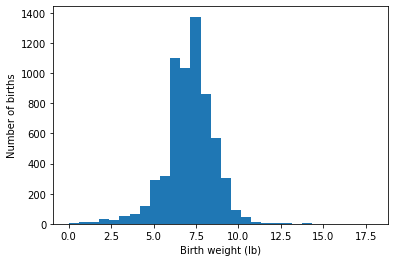

In [22]:
# Veamos el histograma de birth_weight (peso del recién nacido)
# plt -> matplotlib importado al inicio del notebook

plt.hist(birth_weight.dropna(), bins=30) # dropna() hace el drop de los missing values,
                                         # de esta forma sólo tomamos valores válidos
plt.xlabel('Birth weight (lb)')
plt.ylabel('Number of births')
plt.show()

### Ejercicio:

Visualiza el histograma de preg_length en la próxima celda. Sólo tienes que completar el código faltante

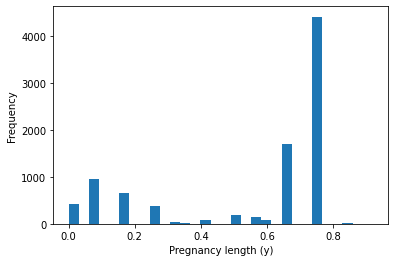

In [24]:
# Veamos el histograma de preg_length (tiempo de embarazo)


plt.hist(preg_length.dropna(), bins=30) # dropna() hace el drop de los missing values,
                                         # de esta forma sólo tomamos valores válidos
plt.xlabel('Pregnancy length (y)')
plt.ylabel('Frequency')
plt.show()

### Filtrar 

La variable **prglngth** del dataframe nsfg tiene las semanas de gestación
Si filtramos por prglngth tendremos a los bebés prematuros

In [25]:
preterm= nsfg['prglngth'] < 37 #bebes prematuros longitud de embarazo menor a 37 semanas

In [26]:
preterm.head()  # preterm es una serie de booleanos: True y false

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

In [27]:
#suma de trues en preterm, esto es ¿Cuántos bebes en nuestro set son prematuros?
preterm.sum()

3742

In [28]:
preterm.mean() #aprox 40% de este dataset son prematuros

0.39987176747168196

In [29]:
# Podemos usar preterm como filtro sobre otras variables para
# obterner su valores en caso de bebés prematuros
# por ejemplo el peso:

preterm_weight= birth_weight[preterm]  #evalua a birth_weight para cuando preterm es True

In [30]:
# Podemos usar preterm también para calcular el peso de los 
# bebés no prematuros usando  ~preterm.
# ~ convierte los true en false y false en trues

full_term_weight = birth_weight[~preterm] 
full_term_weight.mean()

7.372323879231473

### Ejercicio:

¿Puedes reportar la media del peso de los bebés prematuros?

¿En cuánto difiere el peso de los bebés no prematuros de los que sí lo son?

Tienes la próxima celda preparada para los cálculos.

In [32]:
preterm_mean =  preterm_weight.mean()
fullterm_mean = full_term_weight.mean()

diff_weight = fullterm_mean - preterm_mean

print('La media del peso de bebes prematuros es: {}'.format(preterm_mean))

print('La diferencia en libras de peso es: {}'.format(diff_weight))

La media del peso de bebes prematuros es: 5.577598314606742
La diferencia en libras de peso es: 1.7947255646247315


### Dos filtros a la vez

In [33]:
# Filtra los bebés a full-term 
full_term = nsfg['prglngth'] >= 37 

# nbrnaliv contiene si el embarazo es de un sólo bebe ==1 o multiples
single = nsfg['nbrnaliv']==1  #filtro para embarazos de un solo bebé

# Calcula el peso para single full-term babies
single_full_term_weight = birth_weight[full_term & single]  
# el simbolo & es la operación logica AND

print('Media de peso para full-term single babies:', single_full_term_weight.mean())

# Calcula el peso para multiples full-term babies
mult_full_term_weight = birth_weight[full_term & ~single]
print('Media de peso para full-term multiple babies:', mult_full_term_weight.mean())

Media de peso para full-term single babies: 7.385643450184502
Media de peso para full-term multiple babies: 5.768055555555556


# 2. EXPLORANDO RELACIONES

Usaremos los datos del  Behavioral Risk Factor Surveillance System (BRFSS) y exploraremos relaciones con el peso (weight) y altura (height).

Por favor CHEQUEA que este notebook y el archivo *brfss.hdf5* estén en la misma carpeta para poder ejecutar el código correctamente.


In [34]:
# relacion entre altura y peso
brfss = pd.read_hdf('brfss.hdf5', 'brfss') #behavioral risk factor surveillance system

#Asignamos las variables
height = brfss['HTM4'] #cm
weight = brfss['WTKG3'] #kg

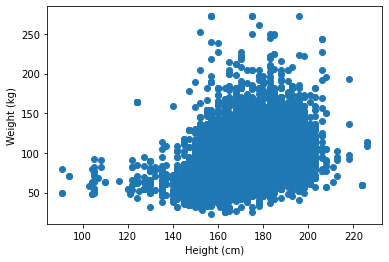

In [35]:
# Veamos el scatter plot height y weight 
# Podremos observar alguna relación aparente?

plt.plot(height, weight,'o') # también podemos usar plt.scatter
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

Es difícil visalizar algo en esa nube de puntos, verás modificaciones del plot hasta que podamos observar algo más interpretable

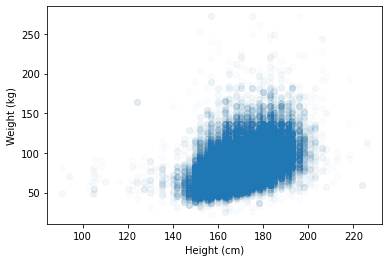

In [36]:
#lo anterior es dificil de interpretar, muchos puntos super puestos
plt.plot(height, weight,'o', alpha=0.02) # añadiendo alpha hacemos más transparentes los puntos
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

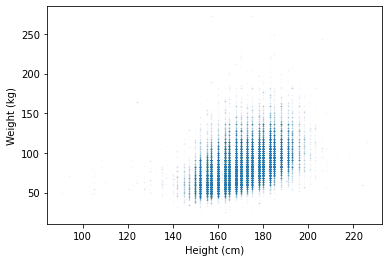

In [37]:
plt.plot(height, weight,'o', markersize=1, alpha=0.02) #cambiando el tamaño del marker size
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

Se pueden observar columnas de valores, esto se debe al sistema de redondeo usado en la adquisición de los datos, podemos añadir un poco de random noise para eliminar este efecto, a este proceso se le conoce como **Jittering**.

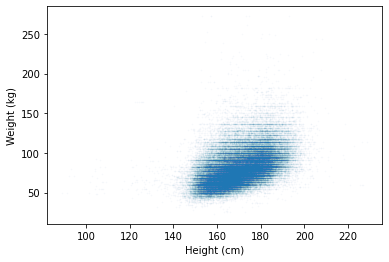

In [38]:
# jittering: añadir algo de random noise para que no se vean esas columnas que no son naturales
# np.random.normal para añadir el random noise, chequea la documentación de numpy para
# aprender más al respecto:
# np.random.normal( MEDIA, DESVIACION ESTANDAR, size= len(brfss)) 

height_jitter= height + np.random.normal(0,2, size= len(brfss))

plt.plot(height_jitter, weight,'o', markersize=1, alpha=0.02)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

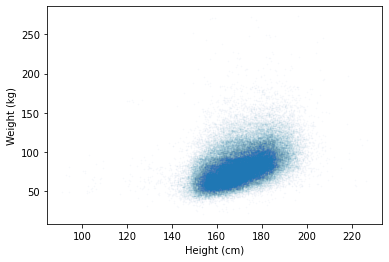

In [39]:
# Ahora vemos las columnas de datos en el peso, hagamos el proceso de jitter en esta variable

height_jitter= height + np.random.normal(0,2, size= len(brfss))
weight_jitter= weight + np.random.normal(0,2, size= len(brfss))

plt.plot(height_jitter, weight_jitter,'o', markersize=1, alpha=0.02)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

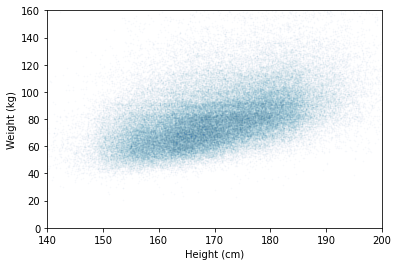

In [40]:
# por último, hagamos un Zoom! que nos ayuden los ejes!

plt.plot(height_jitter, weight_jitter,'o', markersize=1, alpha=0.02)
plt.axis([140,200,0,160])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

Regresa al primer scatter plot. ¿Puedes ver la diferencia entre nuestro resultado final y el primero?
Trabajar con datos no sólo es codificar, una parte esencial de nuestro trabajo es saber *COMUNICAR*.

## Ganamos peso a medida que envejecemos?

Sigamos explorando el dataframe brfss

In [41]:
# Extraemos la variable age del dataframe

age = brfss['AGE']

### Ejercicio:

Completa el código en la siguiente celda para plotear el histograma de age

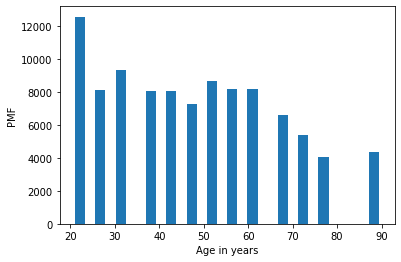

In [53]:
# Histograma de age 
plt.hist(  age.dropna(), bins=30) 

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

###  Scatter plot de edad y peso

### Ejercicio:

Completa el código en la siguiente celda para plotear el scatter plot de age versus weight.

Sólo usaremos las primeras 1000 líneas del dataframe para facilitar el cómputo

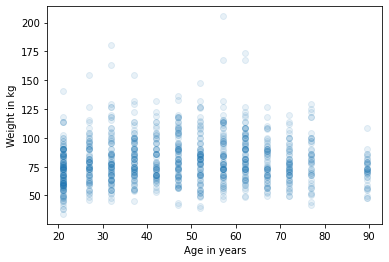

In [57]:
# Primeras 1000 lineas
brfss = brfss[:1000]

# Extracción de age y weight
age = brfss['AGE']
weight = brfss['WTKG3']

#  scatter plot, Completa el código:

plt.plot(age,weight ,'o',alpha=0.1)  #COMPLETA 

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

Puedes observar que se requiere llevar a cabo el proceso de jittering?

Resulta que la edad cae en columnas por un proceso de redondeo en bins de 5 años, llevado a cabo por cuestiones de privacidad de datos.

### Ejercicio:

Completa el código en la siguiente celda para que el scatter plot muestre la relación entre variables de manera más clara

In [ ]:
# Añade el jittering a age con media == 0 y desviación estandar 2.5

age = brfss['AGE'] + np. .normal(  ,  ,size=len(brfss)) #COMPLETA

weight = brfss['WTKG3']

#scatter plot

plt.plot(age, weight ,'o', markersize=5, alpha=0.2)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

Veamos los resultados con todos los datos:

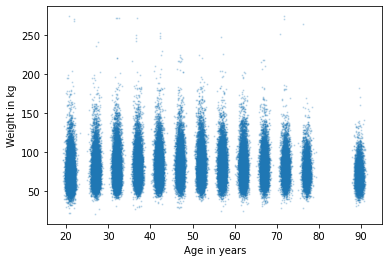

In [ ]:
# With all the data
brfss = pd.read_hdf('brfss.hdf5', 'brfss') #behavioral risk factor surveillance system

age = brfss['AGE'] + np.random.normal(0, 0.5, size=len(brfss))
weight = brfss['WTKG3'] + np.random.normal(0, 2, size=len(brfss))

# Make a scatter plot

plt.plot(age, weight ,'o', markersize=1, alpha=0.2)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

Vemos que existen comportamientos o distribucines de peso por grupos de edad, en este caso un scatter plot no nos ayuda a visulaizar claramente los datos.

## Violinplot

Un violin plot es una combinación entre box plot con un kernel density plot. Pero es más fácil entenderlo visualmente que explicarlo! Veámoslo

In [ ]:
data = brfss.dropna(subset=['AGE', 'WTKG3']) #eliminando las filas con NaN values en AGE y WTKG3

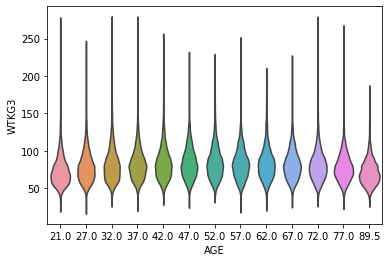

In [ ]:
sns.violinplot(x='AGE', y='WTKG3', data=data, inner= None) 
#usando libreria seaborn que importamos al inicio del notebook
plt.show()


Cada columna es una representación gráfica de la distribución del peso en un grupo de edad
el ancho de estas formas es proporcional a la densidad estimada

##  Box plot:

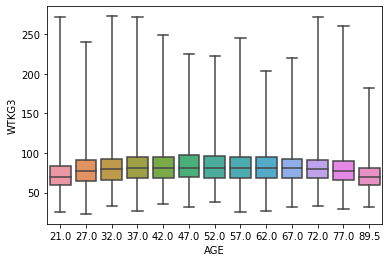

In [ ]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.show()


## Box plot en escala logaritmica

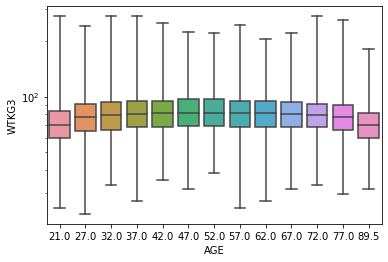

In [ ]:
#log scale
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')
plt.show()

Puedes notar que la media de los box plots trazan una curva?
Ya esto nos indica claramente que la relación no es lineal!!!

## Height y weight

Repitamos el análisis pero ahora con altura ( _HTMG10 que tiene altura en cm) y peso (WTKG3)

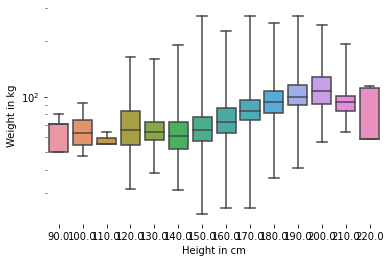

In [ ]:
# Seguimos mismo procedimiento
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

#  box plot
sns.boxplot(x= '_HTMG10', y='WTKG3', data=data, whis=10 )

#  y-axis en log scale
plt.yscale('log')


sns.despine(left=True, bottom=True) # Remueve lineas de ejes
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

## Correlación

Lámina 13 ppt

Exploraremos la correlación de Pearson, mientras más cerca el valor de correlación est

In [58]:
# Escojamos las columnas que queremos analizar: 

# HTM4 -> altura
# WTKG3 -> peso
# AGE -> edad

columns=[ 'HTM4', 'WTKG3','AGE']
subset= brfss[columns] # subset es un dataframe con solo las columnas de interés

### Matriz de correlación

In [59]:
subset.corr() #correlation matrix

,HTM4,WTKG3,AGE
HTM4,1.000000,0.512347,-0.086079
WTKG3,0.512347,1.000000,0.051345
AGE,-0.086079,0.051345,1.000000


### Heat Map

No es más que colorear la matriz de correlación, es más fácil de interpretar

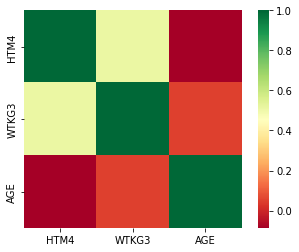

In [60]:
sns.heatmap(subset.corr(), square=True, cmap='RdYlGn')
plt.show()

## Correlación con la dieta

La proxima correlación a explorar incluirá las variables:

_VEGESU1: representa numero de porciones de vegetales consumidas al dia

INCOME2: ingresos

AGE: edad

In [61]:
# Columnas de interés
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]

# correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.014141 -0.021548
INCOME2  -0.014141  1.000000  0.115264
_VEGESU1 -0.021548  0.115264  1.000000


### Ejercicio

Presenta el head map de este resultado y analizalo.

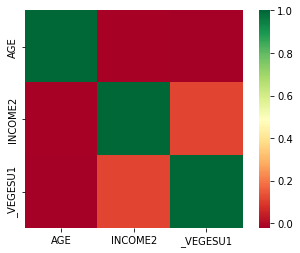

In [62]:
sns.heatmap(  subset.corr()  , square=True, cmap='RdYlGn')  #COMPLETA
plt.show()

# 3. REGRESION LINEAL

Usaremos linregress de scipy.stats para probar relaciones lineales con nuestros datos

In [63]:
from scipy.stats import linregress

In [65]:
# Aquí vemos un ejemplito sencillo de lo que hace linregress
x=[0,1,2,3,4,5,6,7,8]
y=[ 0.3*item +2 for item in x ]  # y= 0.3*x + b

res = linregress(x,y) #ajusta una linea recta entre x e y, reporta pendiente, intercepto, etc

print(res)

LinregressResult(slope=0.30000000000000004, intercept=1.9999999999999996, rvalue=1.0, pvalue=3.292585384803146e-70, stderr=0.0)


### Relación Lineal Peso y altura

In [ ]:
subset = brfss.dropna(subset=['WTKG3','HTM4'])

xs = subset['HTM4']
ys = subset['WTKG3']
res = linregress(xs,ys)
print(res)

LinregressResult(slope=0.919211538184829, intercept=-75.12704250330222, rvalue=0.47420308979024584, pvalue=0.0, stderr=0.005632863769802994)


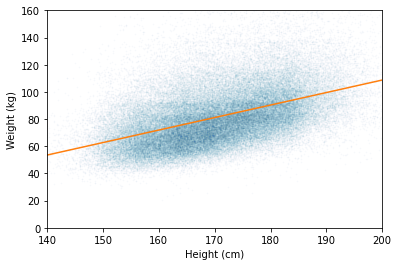

In [ ]:
# Visualización
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope *fx
plt.plot(height_jitter, weight_jitter,'o', markersize=1, alpha=0.02)
plt.axis([140,200,0,160])

plt.plot(fx, fy, '-')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

### Ejercicio

Repite el procedimiento anterior para los ingresos y consumo de vegetales.

Completa el código


In [ ]:
# variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])

xs = subset[ ]  #COMPLETA
ys = subset['_VEGESU1']

#  linear regression
res = linregress(xs,  ) #COMPLETA
print(res)

# Cual es la pendiente de esta supuesta relacion? slope=0.06988

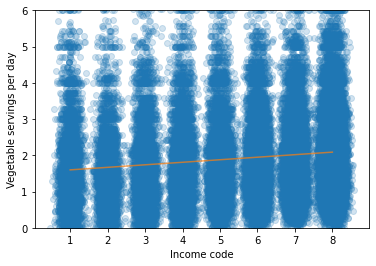

In [ ]:

# scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

Aquí la relación líneal no parece tener mucho sentido!

## Regresión Multiple

Usaremos statsmodels.formula.api para plantear regresiones lineales multiples

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
# ols -> ordinary least squares
results = smf.ols('INCOME2 ~ _VEGESU1', data= brfss).fit() 

#con el método fit() ajustamos la linea recta a la relación INCOME2 como función de VEGESU1
#ya veremos con mucho detalle este método en la próxima sección

In [ ]:
results.params  # intercepto y pendiente. este procedimiento es igual al realizado
# con linregress, si quieres lo puedes comprobar!

Intercept    5.450700
_VEGESU1     0.204935
dtype: float64

## Ingresos y educación

Usaremos datos de **General Social SurveyGSS**. Por favor chequea que tienes el archivo *gss.hdf5* en la misma carpeta que este notebook.


In [ ]:
gss = pd.read_hdf('gss.hdf5','gss')

In [ ]:
# Regression con StatsModels
# realinc es real income
# educ es el nivel de educación

results = smf.ols('realinc ~ educ', data = gss).fit() # y  ~ x
print(results.params)

Intercept   -11539.147837
educ          3586.523659
dtype: float64


In [ ]:
# pero como el income depende de la edad la deberiamos añadir!

#MULTIPLE REGRESSION
results = smf.ols('realinc ~ educ + age', data = gss).fit() # y  ~ x
print(results.params)

# Se muestra el intercepto, y los coeficientes, por ejemplo, el coeficiente para educ es 3655.16

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64


## Income y age

In [ ]:
grouped = gss.groupby('age')  # agrupamos el dataframe por edades

In [ ]:
mean_income_by_age = grouped['realinc'].mean() # calculamos el income medio por edad

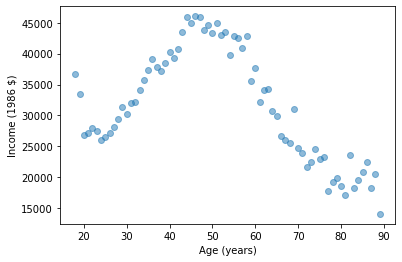

In [ ]:
plt.plot(mean_income_by_age, 'o', alpha=0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.show()

**Observas que la relación es claramente no lineal?**

# 4. RELACIONES NO LINEALES

In [ ]:
# La relación anterior es claramente cuadrática, añadamos un feature extra a nuestro dataframe
# para incluir un término cuadrático:

gss['age2'] = gss['age']**2  # añadiendo columna de edad al cuadrado

In [ ]:
model = smf.ols('realinc ~ educ + age+ age2', data = gss) # y  ~ x
results=model.fit()
print(results.params)

Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64


Aunque el modelo es lineal añadiendo la variable al cuadrado lo convertimos en No Lineal ;)

## Income y education


LLevaremos a cabo un procedimiento similar para income y educación, está atento, puede que tengas que completar algo de código!

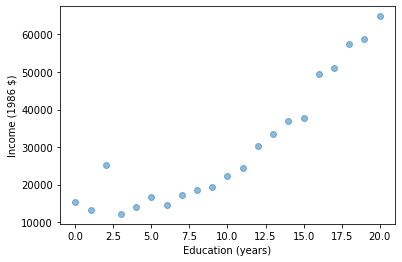

In [ ]:
# Group by educ
grouped =gss.groupby('educ')

# mean income en cada grupo de educación
mean_income_by_educ = grouped['realinc'].mean()

#  scatter plot
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

### Non-linear model 

La variable educ parece variar cuadraticamente con el income.

## Ejercicio

Completa el código para incluir un término cuadrático asociado a la educación

In [ ]:
# Agrega una nueva columna al dataframe que sea educ al cuadrado:

gss['educ2'] = gss['educ']**   #COMPLETA 

# COMPLETA PARA QUE EL MODELO INCLUYA educ, educ2, age, Y age2
model=smf.ols('realinc ~ educ +    + age + age2', data = gss)
results =  model.fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


## Generando predicciones

In [ ]:
# Hacemos un data frame de datos "nuevos"
df= pd.DataFrame()
df['age'] = np.linspace(18,85)
df['age2'] = df['age']**2

df['educ'] = 12 #educ fijo
df['educ2'] = df['educ']**2

In [ ]:
pred12 = results.predict(df) 
#results es nuestro modelo, al aplicar el método .predict sobre datos
#nuevos haremos predicciones. Esto lo veremos con detalle en la próxima sección

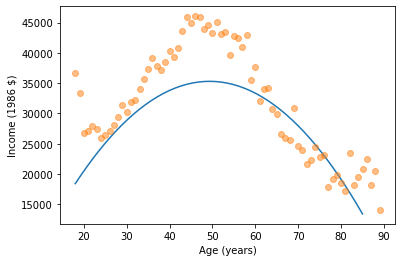

In [ ]:
# Vamos a ver estos resultados!:

plt.plot(df['age'], pred12, label='High school')

plt.plot(mean_income_by_age, 'o', alpha=0.5)
# Label the axes
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.show()

Mismo procedimiento pero con educ fijo a 14 años

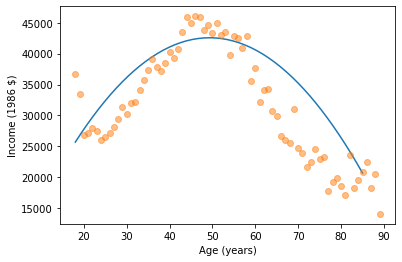

In [ ]:
df['educ'] = 14
df['educ2'] = df['educ']**2
pred14 = results.predict(df)

plt.plot(df['age'], pred14, label='Associate')

plt.plot(mean_income_by_age, 'o', alpha=0.5)
# Label the axes
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.show()

Mismo procedimiento pero con educ fijo a 16 años

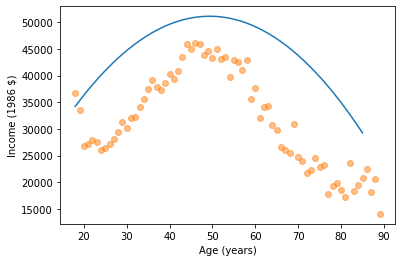

In [ ]:
df['educ'] = 16
df['educ2'] = df['educ']**2
pred16 = results.predict(df)

plt.plot(df['age'], pred16, label='Bachelor')

plt.plot(mean_income_by_age, 'o', alpha=0.5)
# Label the axes
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.show()

### Veamos los resultados de forma más coherente:

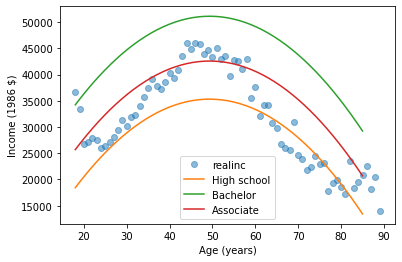

In [ ]:
plt.plot(mean_income_by_age, 'o', alpha=0.5, label='realinc')
plt.plot(df['age'], pred12, label='High school')
plt.plot(df['age'], pred16, label='Bachelor')
plt.plot(df['age'], pred14, label='Associate')
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

## Incluyamos variables categoricas

Para estos datos sabemos si corresponden a hombres o mujeres en la variable *sex*.

Dado que es una entrada no numérica, es una etiqueta o clase, tenemos que indicarle a este modelo que lo es. Eso lo hacemos añadiendo C(*variable*) en la fórmula.

Este procedimiento **solo** aplica para este modelo, en la próxima sección veremos una forma más generica de tratar con variables categóricas

In [ ]:
formula = 'realinc ~ educ + educ2 + age + age2 + C(sex)'
results = smf.ols(formula, data=gss).fit()
results.params

Intercept     -22369.453641
C(sex)[T.2]    -4156.113865
educ            -310.247419
educ2            150.514091
age             1703.047502
age2             -17.238711
dtype: float64

sex=1 es hombre, sex=2 es mujer.

El coeficiente reporta la diferencia asociada con el valor sex=2 con respecto a sex=1.
En este caso el income es aprox 4100 dolares menos para mujeres que para hombres.

Terrible!!!

## Prediciendo una variable categorica

En el dataframe la columna **grass** contiene la respuesta Yes or Not a aprobar la legalización del cannabis en U.S.A.

Vamos a usar una regresión logistica simple para predecir esta variable usando edad, sexo, y nivel de educación como inputs.

En la próxima sección veremos modelos más complejos, pero este es apropiado para entender causalidades.


El modelo admite variables binarias, 0 y 1 , así que hay que modificar la variable para que cumpla con esto:

In [ ]:
gss['grass'].unique()  # los 2 significan que no, cambiemos a 0

array([nan,  2.,  1.])

In [ ]:
gss['grass'].replace(2, 0, inplace=True)

In [ ]:
# Regresion Logistica (regresion para variables categoricas)
results = smf.logit('grass ~ educ + educ2 + age + age2 + C(sex)', data= gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


Intercept     -1.685223
C(sex)[T.2]   -0.384611
educ           0.221860
educ2         -0.004163
age           -0.034756
age2           0.000192
dtype: float64

Construyamos datos para plotear:

In [ ]:
# range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# education level fijo 12
df['educ'] = 12
df['educ2'] = df['educ']**2

In [ ]:
# Genera predicciones para hombres y mujeres:
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

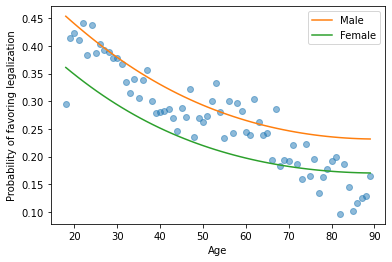

In [ ]:
# Grafiquemos!
plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()

Qué piensas de estos resultados? Interesantes cierto?

De seguro ya entendemos mejor nuestros datos!

Ve a la evaluación de esta sección, no olvides que necesitaras este notebook y los ejercicios que hemos hecho.

Buena suerte!